# Set Up
Importing needed packages and loading the original data file

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import graphviz

In [2]:
df = pd.read_sas('C:\\Users\\Ben\\OneDrive\\Documents\\Study\\CIND820\\Data\\LLCP2021.XPT')

C:\Users\Ben\anaconda3\envs\coursera\lib\site-packages\pandas\io\sas\sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


# Column Removal
Removing columns and rows from the data below. Please see literature review document for reasoning on individual columns/rows

In [3]:
df = df[df.DISPCODE != 1200] #drop rows where DISPCODE = 1200 (Partially Complete Interview)
df.drop(['DISPCODE', '_STATE','FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 
         'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'SAFETIME', 
         'CTELNUM1', 'CELLFON5', 'CADULT1', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'DIABAGE3',
         'ARTHEXER', 'ARTHEDU', 'ARTHDIS2', 'RENTHOM1', 'NUMHHOL3', 'NUMPHON3', 'CPDEMO1B', 'VETERAN3', 'EMPLOY1',
         'CHILDREN', 'PREGNANT','DIFFWALK', 'DIFFDRES', 'DIFFALON', 'FLSHTMY3', 'IMFVPLA2', 'HIVTST7', 'HIVTSTD3', 'PDIABTST',
        'BLDSUGAR', 'FEETCHK3', 'DOCTDIAB', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD3',
        'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'HAVARTH5', 'LMTJOIN3', 'JOINPAI2', 'DEAF', 'BLIND', 'DECIDE', 'PREDIAB1', 'INSULIN1',
        'FEETCHK', 'EYEEXAM1', 'DIABEYE', 'DIABEDU', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'TOLDHEPC', 'TRETHEPC', 'PRIRHEPC',
        'HAVEHEPC', 'HAVEHEPB', 'MEDSHEPB', 'HPVADVC4', 'HPVADSHT', 'TETANUS1', 'SHINGLE2', 'LCSCTSCN', 'HADMAM', 'HOWLONG',
        'CERVSCRN', 'CRVCLCNC', 'CRVCLPAP', 'CRVCLHPV', 'HADHYST2', 'PSATEST1', 'PSATIME1', 'PCPSARS2', 'PCSTALK', 'HADSIGM4',
        'COLNSIGM', 'COLNTES1', 'SIGMTES1', 'LASTSIG4', 'COLNCNCR', 'VIRCOLO1', 'VCLNTES1', 'SMALSTOL', 'STOLTEST', 'STOOLDN1',
        'BLDSTFIT', 'SDNATES1', 'CNCRDIFF', 'CNCRAGE', 'CNCRTYP1', 'CSRVTRT3', 'CSRVDOC1', 'CSRVSUM', 'CSRVRTRN', 'CSRVINST',
        'CSRVINSR', 'CSRVDEIN', 'CSRVCLIN', 'CSRVPAIN', 'CSRVCTL2', 'HOMRGCHK', 'HOMBPCHK', 'WHEREBP', 'SHAREBP', 'WTCHSALT',
        'DRADVISE', 'CIMEMLOS', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'CDDISCUS', 'CAREGIV1', 'CRGVREL4', 'CRGVLNG1'
        , 'CRGVHRS1', 'CRGVPRB3', 'CRGVALZD', 'CRGVPER1', 'CRGVHOU1', 'CRGVEXPT', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN',
        'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX', 'ACEADSAF', 'ACEADNED',
        'GUNLOAD', 'LOADULK2', 'RCSRLTN2', 'RCSGENDR', 'CASTHDX2', 'CASTHNO2', 'BIRTHSEX', 'SOMALE', 'SOFEMALE', 'TRNSGNDR',
        'QSTVER', 'QSTLANG', '_METSTAT', '_URBSTAT', 'MSCODE', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_CHISPNC', '_CRACE1',
        '_CPRACE1', 'CAGEG', '_CLLCPWT', '_DUALUSE', '_DUALCOR', '_LLCPWT2', '_LLCPWT', '_RFHLTH', '_PHYS14D', '_MENT14D',
        '_HLTHPLN', '_HCVU652', '_TOTINDA', '_RFHYPE6', '_CHOLCH3', '_RFCHOL3', '_MICHD', '_LTASTH1', '_CASTHM1', '_ASTHMS1',
        '_DRDXAR3', '_DRDXAR3', '_LMTWRK3', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACEPRV', '_SEX',
        '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G', 'HEIGHT3', 'HTM4', 'WEIGHT2', '_BMI5', '_RFBMI5', '_CHLDCNT', '_EDUCAG',
        'INCOME3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', 'DROCDY3_', '_RFBING5', '_DRNKWK1', '_RFDRHV7', '_FLSHOT7', '_PNEUMO3',
        '_AIDTST4', '_MISFRT1', '_FRTRES1', '_VEGRES1',
        '_FRUTSU1', '_VEGESU1', '_FRTLT1A', '_VEGLT1A', '_FRT16A', '_VEGETE1', '_FRUITE1', '_VEG23A', 'FIREARM5', 'COLGSEX',
        'LANDSEX', 'CELLSEX', 'PERSDOC3', 'PNEUVAC4', 'FLUSHOT7', 'CHKHEMO3', '_LMTACT3', 'HTIN4', 'SMOKE100','SMOKDAY2', '_MISVEG1'
        ,'FRUIT2', 'FRUITJU2', 'FVGREEN1', 'FRENCHF1', 'POTATOE1', 'VEGETAB2', 'FTJUDA2_', 'FRUTDA2_', 'GRENDA1_', 'FRNCHDA_', 'POTADA1_', 'VEGEDA2_', '_SMOKER3', 'PRIMINSR'
        , 'MARITAL', 'DRNK3GE5', 'LASTSMK2', 'STOPSMK2', 'USEMRJN3', 'WTKG3'], axis=1, inplace=True)

df.set_axis(range(len(df)), inplace=True)


# Imputing Values
In each of the variables there are common scenarioes where values are either blank or have an assigned value such as 777, 888, 999, 77,88,99 etc. that indicate the respondent is unsure, refused to answer or was not asked the question. Below is the process of imputing values (either mode, median or mean) depending on the variables distribution and type. There are certain scenarios where I have chosen not to impute a value until a later stage into null values as this question may have been non applicable to the particular respondent and further logic is required.

In [4]:
#pd.crosstab(index=df['LCSLAST'], columns='count') 
#sns.displot(df, x="LCSLAST")
df['LCSLASTMEDIAN'] = df['LCSLAST'].replace({777:np.nan, 999:np.nan})
LCSLASTMEDIAN=int(df['LCSLASTMEDIAN'].median())
df['LCSLAST']=df['LCSLAST'].replace({777:LCSLASTMEDIAN, 999:LCSLASTMEDIAN})
df.drop(['LCSLASTMEDIAN'], axis=1, inplace=True)

#Due to distribution being relatively uniform I have chosen to use the median value to impute for 777 and 999. I have 
#complete this in above manner as I do not want them to be mixed with the true null answers which are valid null answers and
#should not be imputed for

In [5]:
i=1
for i in range(len(df.ALCDAY5)):
    if df['ALCDAY5'][i] > 100 and df['ALCDAY5'][i] < 108:
        df['ALCDAY5'][i]=round(((df['ALCDAY5'][i] - 100)*4.34524))
    elif df['ALCDAY5'][i] > 200 and df['ALCDAY5'][i] < 231:
        df['ALCDAY5'][i]=df['ALCDAY5'][i] - 200
    elif df['ALCDAY5'][i] == 777:
        df['ALCDAY5'][i]=df['ALCDAY5'][i] = 0
    elif df['ALCDAY5'][i] == 888:
        df['ALCDAY5'][i]=df['ALCDAY5'][i] = 0
    elif df['ALCDAY5'][i] == 999:
        df['ALCDAY5'][i]=df['ALCDAY5'][i] = 0
    else:
        df['ALCDAY5'][i] = df['ALCDAY5'][i]
#This variable required transformation in order to convert to a consistent number for analysis (e.g. respondents could answer
#in number of days they drank per week or per month). Where value represents refused to answer etc. imputing mode (0) as not
#a normal distribution

In [6]:
df['AVEDRNK3']=df['AVEDRNK3'].replace({88:0, 77:np.nan, 99:np.nan})
#pd.crosstab(index=df['AVEDRNK3'], columns='count') - This was used to establish mode was best value - not normal dist.
AVEDRNK3MODE=int(df['AVEDRNK3'].mode())
df['AVEDRNK3']=df['AVEDRNK3'].replace({np.nan:AVEDRNK3MODE})

In [7]:
#sns.displot(df, x="WTKG3")
#sns.displot(df, x="_BMI5")

#Reviewing for normal distribution as continuous variable, approximately normal distribution confirmed for both.
#Will use the mean value for imputation below if required

In [8]:
df['GENHLTH']=df['GENHLTH'].replace({7:np.nan,9:np.nan})
GENHLTHMEAN = round(df['GENHLTH'].mean())
df['GENHLTH']=df['GENHLTH'].replace({np.nan:GENHLTHMEAN})

df['_INCOMG1']=df['_INCOMG1'].replace({9:np.nan})
_INCOMG1MEAN = round(df['_INCOMG1'].mean())
df['_INCOMG1']=df['_INCOMG1'].replace({np.nan:_INCOMG1MEAN})


#This is an ordinal categorical variabl. 7 and 9 are both values used to indicate a lack of answer. 7 and 9 were removed 
#first to avoid skewing the average response.

In [9]:
df['PHYSHLTH']=df['PHYSHLTH'].replace({77:np.nan, 99:np.nan, 88:0})
PHYSHLTHMODE=int(df['PHYSHLTH'].mode())
df['PHYSHLTH']=df['PHYSHLTH'].replace({np.nan:PHYSHLTHMODE})

df['MENTHLTH']=df['MENTHLTH'].replace({77:np.nan, 99:np.nan, 88:0})
MENTHLTHMODE=int(df['MENTHLTH'].mode())
df['MENTHLTH']=df['MENTHLTH'].replace({np.nan:MENTHLTHMODE})

df['POORHLTH']=df['POORHLTH'].replace({77:np.nan, 99:np.nan, 88:0})
POORHLTHMODE=int(df['POORHLTH'].mode())
df['POORHLTH']=df['POORHLTH'].replace({np.nan:POORHLTHMODE})

df['MEDCOST1']=df['MEDCOST1'].replace({7:np.nan,9:np.nan})
MEDCOST1MODE=int(df['MEDCOST1'].mode())
df['MEDCOST1']=df['MEDCOST1'].replace({np.nan:MEDCOST1MODE})

df['CHECKUP1']=df['CHECKUP1'].replace({7:np.nan,9:np.nan})
CHECKUP1MODE=int(df['CHECKUP1'].mode())
df['CHECKUP1']=df['CHECKUP1'].replace({np.nan:CHECKUP1MODE})

df['EXERANY2']=df['EXERANY2'].replace({7:np.nan,9:np.nan})
EXERANY2MODE=int(df['EXERANY2'].mode())
df['EXERANY2']=df['EXERANY2'].replace({np.nan:EXERANY2MODE})

df['BPHIGH6']=df['BPHIGH6'].replace({7:np.nan,9:np.nan})
BPHIGH6MODE=int(df['BPHIGH6'].mode())
df['BPHIGH6']=df['BPHIGH6'].replace({np.nan:BPHIGH6MODE})

df['CHOLCHK3']=df['CHOLCHK3'].replace({7:np.nan,9:np.nan})
CHOLCHK3MODE=int(df['CHOLCHK3'].mode())
df['CHOLCHK3']=df['CHOLCHK3'].replace({np.nan:CHOLCHK3MODE})

df['EDUCA']=df['EDUCA'].replace({9:np.nan})
EDUCAMODE=int(df['EDUCA'].mode())
df['EDUCA']=df['EDUCA'].replace({np.nan:EDUCAMODE})

df['USENOW3']=df['USENOW3'].replace({7:np.nan,9:np.nan})
USENOW3MODE=int(df['USENOW3'].mode())
df['USENOW3']=df['USENOW3'].replace({np.nan:USENOW3MODE})

df['ECIGNOW1']=df['ECIGNOW1'].replace({7:np.nan,9:np.nan})
ECIGNOW1MODE=int(df['ECIGNOW1'].mode())
df['ECIGNOW1']=df['ECIGNOW1'].replace({np.nan:ECIGNOW1MODE})


_BMI5CATMODE=int(df['_BMI5CAT'].mode())
df['_BMI5CAT']=df['_BMI5CAT'].replace({np.nan:_BMI5CATMODE})


#Similiar to above imputation, however mode was used to calculate the above as this was the strong majority of responses in these 
#cases after reviewing distribution plots (non normal dist) or in some cases due to it being a non-ordinal categorical 
#variable.

In [10]:
df['BPMEDS']=df['BPMEDS'].replace({7:1,9:1})

df['TOLDHI3']=df['TOLDHI3'].replace({7:2,9:2})

df['CHOLMED3']=df['CHOLMED3'].replace({7:2,9:2})

df['MAXDRNKS']=df['MAXDRNKS'].replace({77:1,99:1})

df['LCSFIRST']=df['LCSFIRST'].replace({777:18,999:18,888:18})

df['LCSNUMCG']=df['LCSNUMCG'].replace({777:20,999:20})

df['MARIJAN1']=df['MARIJAN1'].replace({88:0,77:0,99:0})

df['RSNMRJN2']=df['RSNMRJN2'].replace({7:3,9:3})

#blanks in this situation is acceptable as question only asked based on previous responses. Certain values are being imputed 
#because these imply an answer in a previous question that means they should be answered, however the respondent refused
#or wasnt sure. 

In [11]:
df['CVDINFR4']=df['CVDINFR4'].replace({7:np.nan,9:np.nan})
df = df.dropna(axis=0, subset=['CVDINFR4'])
df.set_axis(range(len(df)), inplace=True)
#Removing rows where the value is 7 (Don't Know/Not Sure) or 9 (Refused) or Blank (Not asked or Missing). Since this is my
#target variable I did not see a benefit in keeping a record where the outcome was not clear and did not want to introduce
#any bias.



# Bucketing Variables
For variables where the values were continuous numerical values, I have elected to bucket these into groups to assist with categorical machine learning in later steps. These groups were decided based on evenly dividing the variables range, or in a manner which was related to the variable itself (e.g. smoking age - 0-18 Y/O as a starting point, with larger ranges as age increases since number of people starting smoking at an older age reduces)

In [12]:
i=1
for i in range(len(df.PHYSHLTH)):
    if df['PHYSHLTH'][i] <= 6:
        df['PHYSHLTH'][i]= 1
    elif df['PHYSHLTH'][i] > 6 and df['PHYSHLTH'][i] <= 12:
        df['PHYSHLTH'][i]=2
    elif df['PHYSHLTH'][i] > 12 and df['PHYSHLTH'][i] <= 18:
        df['PHYSHLTH'][i]=3
    elif df['PHYSHLTH'][i] > 18 and df['PHYSHLTH'][i] <= 24:
        df['PHYSHLTH'][i]=4
    elif df['PHYSHLTH'][i] > 24 and df['PHYSHLTH'][i] <= 30:
        df['PHYSHLTH'][i]=5

In [13]:
i=1
for i in range(len(df.MENTHLTH)):
    if df['MENTHLTH'][i] <= 6:
        df['MENTHLTH'][i]= 1
    elif df['MENTHLTH'][i] > 6 and df['MENTHLTH'][i] <= 12:
        df['MENTHLTH'][i]=2
    elif df['MENTHLTH'][i] > 12 and df['MENTHLTH'][i] <= 18:
        df['MENTHLTH'][i]=3
    elif df['MENTHLTH'][i] > 18 and df['MENTHLTH'][i] <= 24:
        df['MENTHLTH'][i]=4
    elif df['MENTHLTH'][i] > 24 and df['MENTHLTH'][i] <= 30:
        df['MENTHLTH'][i]=5

In [14]:
i=1
for i in range(len(df.POORHLTH)):
    if df['POORHLTH'][i] <= 6:
        df['POORHLTH'][i]= 1
    elif df['POORHLTH'][i] > 6 and df['POORHLTH'][i] <= 12:
        df['POORHLTH'][i]=2
    elif df['POORHLTH'][i] > 12 and df['POORHLTH'][i] <= 18:
        df['POORHLTH'][i]=3
    elif df['POORHLTH'][i] > 18 and df['POORHLTH'][i] <= 24:
        df['POORHLTH'][i]=4
    elif df['POORHLTH'][i] > 24 and df['POORHLTH'][i] <= 30:
        df['POORHLTH'][i]=5

In [15]:
i=1
for i in range(len(df.ALCDAY5)):
    if df['ALCDAY5'][i] == 0:
        df['ALCDAY5'][i]= 0
    elif df['ALCDAY5'][i] > 0 and df['ALCDAY5'][i] <= 6:
        df['ALCDAY5'][i]=1
    elif df['ALCDAY5'][i] > 6 and df['ALCDAY5'][i] <= 12:
        df['ALCDAY5'][i]=2
    elif df['ALCDAY5'][i] > 12 and df['ALCDAY5'][i] <= 18:
        df['ALCDAY5'][i]=3
    elif df['ALCDAY5'][i] > 18 and df['ALCDAY5'][i] <= 24:
        df['ALCDAY5'][i]=4
    elif df['ALCDAY5'][i] > 24 and df['ALCDAY5'][i] <= 30:
        df['ALCDAY5'][i]=5

In [16]:
i=1
for i in range(len(df.MAXDRNKS)):
    if df['MAXDRNKS'][i] == 0:
        df['MAXDRNKS'][i]= 0
    elif df['MAXDRNKS'][i] > 0 and df['MAXDRNKS'][i] <= 6:
        df['MAXDRNKS'][i]=1
    elif df['MAXDRNKS'][i] > 6 and df['MAXDRNKS'][i] <= 12:
        df['MAXDRNKS'][i]=2
    elif df['MAXDRNKS'][i] > 12 and df['MAXDRNKS'][i] <= 18:
        df['MAXDRNKS'][i]=3
    elif df['MAXDRNKS'][i] > 18 and df['MAXDRNKS'][i] <= 24:
        df['MAXDRNKS'][i]=4
    elif df['MAXDRNKS'][i] > 24:
        df['MAXDRNKS'][i]=5

In [17]:
i=1
for i in range(len(df.LCSFIRST)):
    if df['LCSFIRST'][i] <= 18:
        df['LCSFIRST'][i]= 1
    elif df['LCSFIRST'][i] > 18 and df['LCSFIRST'][i] <= 25:
        df['LCSFIRST'][i]=2
    elif df['LCSFIRST'][i] > 25 and df['LCSFIRST'][i] <= 35:
        df['LCSFIRST'][i]=3
    elif df['LCSFIRST'][i] > 35 and df['LCSFIRST'][i] <= 45:
        df['LCSFIRST'][i]=4
    elif df['LCSFIRST'][i] > 45:
        df['LCSFIRST'][i]=5

In [18]:
i=1
for i in range(len(df.LCSLAST)):
    if df['LCSLAST'][i] <= 18:
        df['LCSLAST'][i]= 1
    elif df['LCSLAST'][i] > 18 and df['LCSLAST'][i] <= 25:
        df['LCSLAST'][i]=2
    elif df['LCSLAST'][i] > 25 and df['LCSLAST'][i] <= 35:
        df['LCSLAST'][i]=3
    elif df['LCSLAST'][i] > 35 and df['LCSLAST'][i] <= 45:
        df['LCSLAST'][i]=4
    elif df['LCSLAST'][i] > 45:
        df['LCSLAST'][i]=5

In [19]:
i=1
for i in range(len(df.LCSNUMCG)):
    if df['LCSNUMCG'][i] <= 10:
        df['LCSNUMCG'][i]= 1
    elif df['LCSNUMCG'][i] > 10 and df['LCSNUMCG'][i] <= 20:
        df['LCSNUMCG'][i]=2
    elif df['LCSNUMCG'][i] > 20 and df['LCSNUMCG'][i] <= 40:
        df['LCSNUMCG'][i]=3
    elif df['LCSNUMCG'][i] > 40 and df['LCSNUMCG'][i] <= 50:
        df['LCSNUMCG'][i]=4
    elif df['LCSNUMCG'][i] > 50:
        df['LCSNUMCG'][i]=5

In [20]:
i=1
for i in range(len(df.MARIJAN1)):
    if df['MARIJAN1'][i] <= 6:
        df['MARIJAN1'][i]= 1
    elif df['MARIJAN1'][i] > 6 and df['MARIJAN1'][i] <= 12:
        df['MARIJAN1'][i]=2
    elif df['MARIJAN1'][i] > 12 and df['MARIJAN1'][i] <= 18:
        df['MARIJAN1'][i]=3
    elif df['MARIJAN1'][i] > 18 and df['MARIJAN1'][i] <= 24:
        df['MARIJAN1'][i]=4
    elif df['MARIJAN1'][i] > 24 and df['MARIJAN1'][i] <= 30:
        df['MARIJAN1'][i]=5

In [21]:
i=1
for i in range(len(df.AVEDRNK3)):
    if df['AVEDRNK3'][i] == 0:
        df['AVEDRNK3'][i]= 0
    elif df['AVEDRNK3'][i] > 0 and df['AVEDRNK3'][i] <= 6:
        df['AVEDRNK3'][i]=1
    elif df['AVEDRNK3'][i] > 6 and df['AVEDRNK3'][i] <= 12:
        df['AVEDRNK3'][i]=2
    elif df['AVEDRNK3'][i] > 12 and df['AVEDRNK3'][i] <= 18:
        df['AVEDRNK3'][i]=3
    elif df['AVEDRNK3'][i] > 18 and df['AVEDRNK3'][i] <= 24:
        df['AVEDRNK3'][i]=4
    elif df['AVEDRNK3'][i] > 24:
        df['AVEDRNK3'][i]=5

# Correlation Analysis
Reviewing variables for potential correlation as a method to reduce the number of variables in the analysis post the initial grooming of variables

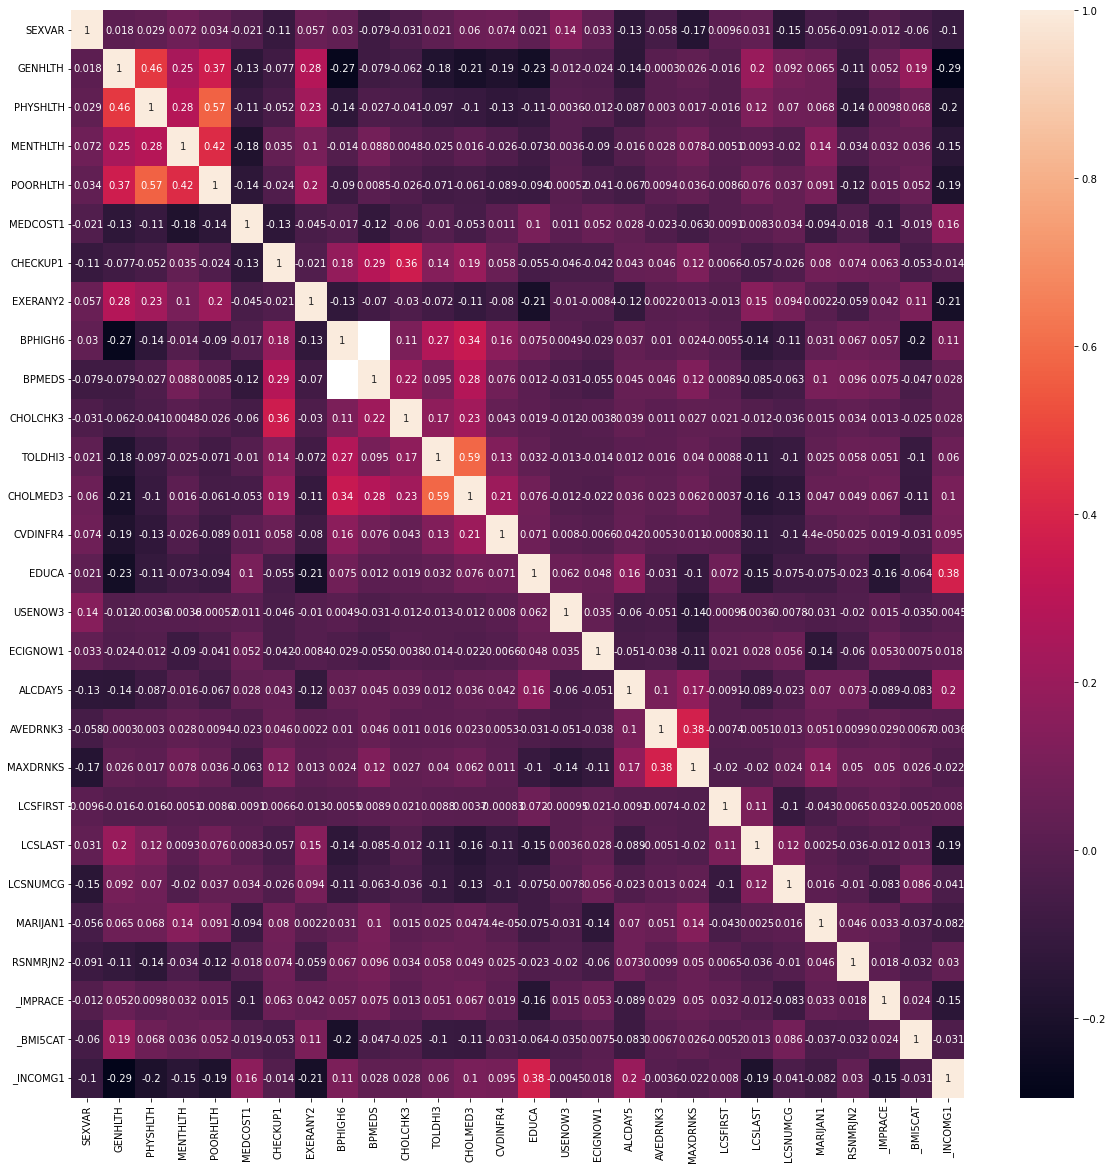

In [22]:
plt.rcParams["figure.figsize"] = (20,20)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()
#There are currently variables with a moderately strong correlation (Poor Health vs Physical Health, Chol Medication vs High Chol etc.) 
#however at this stage I am opting to keep these variables as is but will keep in mind and potentially remove when 
#implementing learning models

# Further Data Processing
In order to prepare for further analysis, need to either consolidate columns or further impute values to remove any nulls with values that make sense so that the algorithms can run successfully

In [23]:
df['MAXDRNKS']=df['MAXDRNKS'].replace({np.nan:0})
#These are respondents who do not drink, imputing 0 as a method to add a category representing those who does not drink

In [24]:
df['TOLDHI3']=df['TOLDHI3'].replace({np.nan:2})
#These are respondents who have not had a cholesterol check. Imputing 'no' as to whether they have been told they have high
#blood pressure

In [25]:
df['LCSFIRST']=df['LCSFIRST'].replace({np.nan:0})
df['LCSLAST']=df['LCSLAST'].replace({np.nan:0})
df['LCSNUMCG']=df['LCSNUMCG'].replace({np.nan:0})
#These are respondents who do not smoke, imputing 0 as a method to add a category representing those who does not smoke

In [26]:
df['MARIJAN1']=df['MARIJAN1'].replace({np.nan:0})
df['RSNMRJN2']=df['RSNMRJN2'].replace({np.nan:0})
#These are respondents who do not use marijuana, imputing 0 as a method to add a category representing those who does not use marijuana

In [27]:
df.drop(['BPMEDS', 'CHOLMED3' ], axis=1, inplace=True)
#Dropping due to correlation with BPHIGH6 and TOLDHI3 

# Balancing Data & Splitting Test/Train

In this section I have split the data into a training set and a test set. This is a method I am using in order to avoid overtraining the algorithms. In my future 'refining' of the algorithm I also intend to implement cross validation to ensure I do not have an outlier situation with this split of data. 

As a secondary method of mitigating bias I have also used a technique called SMOTE in order to balance my data set. SMOTE is synthetically increasing the number of 'positive' heart attack cases within the data set as these were a minority before. 



In [28]:
df_train = df.sample(frac=0.7, random_state=25)
df_test = df.drop(df_train.index)

In [29]:
smt = SMOTETomek(random_state=1)
feature_cols1 = ['EXERANY2', 'USENOW3', 'ECIGNOW1', 'ALCDAY5', 'AVEDRNK3', 'MAXDRNKS', 'LCSFIRST','LCSLAST', 'LCSNUMCG', 'MARIJAN1', '_BMI5CAT']
x1=df_train[feature_cols1]
y1=df_train['CVDINFR4']
X_smt, y_smt = smt.fit_resample(x1,y1)

x1_test= df_test[feature_cols1]
x1_testanswer=df_test['CVDINFR4']


# Modeling Attempt 1 - All variables
Utilizing lifestyle variables and ignoring any demographic related variables or general health variables. As I refine the process and analyze further for significance, for more accurate results in the next stage I may choose to reduce the number of variables

#### Logistic Regression

In [30]:
model = LogisticRegression(solver='liblinear', random_state=25).fit(X_smt,y_smt)
model.predict(x1_test)



array([1., 1., 1., ..., 2., 2., 2.])

#### K Nearest Neighbours

In [31]:
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(X_smt, y_smt) 

KNeighborsClassifier()

#### Decision Tree

In [31]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_smt, y_smt)


# Results from Logistic Regression, KNN and Decision Tree

Overall my interest in assessing the initial 'success' of the algorithms is based on accuracy. I do not have any reason to consider recall or precision at a higher priority as I consider the consequence of a false positive or false negative to be equally consequential in the interpretation of these results. 

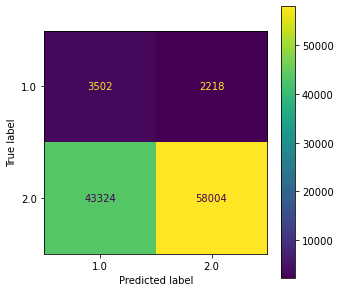

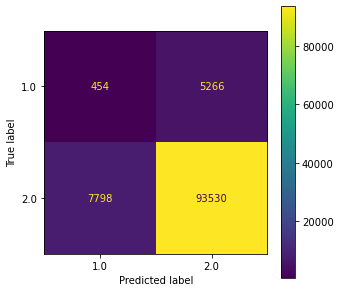

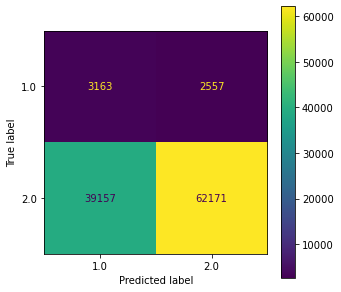

In [37]:
plt.rcParams["figure.figsize"] = (5,5)
plot_confusion_matrix(model, x1_test, x1_testanswer)  
plot_confusion_matrix(classifier, x1_test, x1_testanswer)
plot_confusion_matrix(clf, x1_test, x1_testanswer)

In [41]:
X1_Estimate_Log = model.predict(x1_test)
X1_Estimate_KNN = classifier.predict(x1_test)
X1_Estimate_CLF = clf.predict(x1_test)

Accuracy_Log= accuracy_score(x1_testanswer, X1_Estimate_Log)
Recall_Log=recall_score(x1_testanswer, X1_Estimate_Log, pos_label=1)
Precision_Log= precision_score(x1_testanswer, X1_Estimate_Log, pos_label=1.0)

Accuracy_KNN= accuracy_score(x1_testanswer, X1_Estimate_KNN)
Recall_KNN=recall_score(x1_testanswer, X1_Estimate_KNN, pos_label=1)
Precision_KNN= precision_score(x1_testanswer, X1_Estimate_KNN, pos_label=1.0)

Accuracy_CLF= accuracy_score(x1_testanswer, X1_Estimate_CLF)
Recall_CLF=recall_score(x1_testanswer, X1_Estimate_CLF, pos_label=1)
Precision_CLF= precision_score(x1_testanswer, X1_Estimate_CLF, pos_label=1.0)


print("Accuracy Log Model: ", Accuracy_Log,"\n",
    "Recall Log Model: ",Recall_Log,"\n",
    "Precision Log Model: ",Precision_Log, "\n",
    "Accuracy KNN Model: ",Accuracy_KNN,"\n",
    "Recall KNN Model: ",Recall_KNN,"\n",
    "Precision KNN Model: ",Precision_KNN,"\n",
    "Accuracy Decision Tree Model: ",Accuracy_CLF,"\n",
    "Recall Decision Tree Model: ",Recall_CLF,"\n",
    "Precision Decision Tree Model: ",Precision_CLF)

Accuracy Log Model:  0.5745646812644795 
 Recall Log Model:  0.6122377622377623 
 Precision Log Model:  0.07478751121171999 
 Accuracy KNN Model:  0.8779612883939915 
 Recall KNN Model:  0.07937062937062937 
 Precision KNN Model:  0.055016965584100824 
 Accuracy Decision Tree Model:  0.6103243404827741 
 Recall Decision Tree Model:  0.5529720279720279 
 Precision Decision Tree Model:  0.07474007561436673


# Next steps
As I now have a base level of 'clean' data for the purposes of analysis and a base measure of accuracy regarding some machine learning algorithms I intend to explore:
     - Can I build an improved model to a statistically significant measure
     - Utilize cross validation in order to ensure I am correctly/accurately assessing the accuracy of predictions against the test data set
     - Although not directly related to my machine learning goal, I will explore utilizing data mining techniques to help provide context to my reasearch questions around health/lifestyle choices and their relation to the likelihood of a heart attack.
     - Summarize my machine learning findings as well as comment on the potential statistics significance of any improvement in the above models